In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('src\\Dataset\\Liver Patient Dataset (LPD)_train.csv',encoding= 'unicode_escape')

In [3]:
features = df.drop('Result', axis=1)
target = df['Result']

categorical_cols = features.select_dtypes(include=['object', 'category']).columns
numeric_cols = features.select_dtypes(include=['number']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

scaled_features = preprocessor.fit_transform(features)

In [4]:
k_range = range(1, 11)

kmeans_inertia = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    kmeans_inertia.append(kmeans.inertia_)

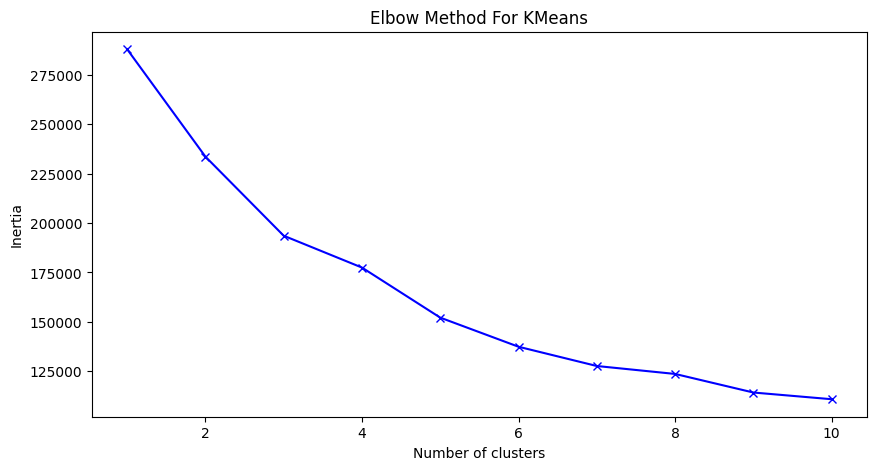

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, kmeans_inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For KMeans')
plt.show()

In [6]:
gmm_bic = []
for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(scaled_features)
    gmm_bic.append(gmm.bic(scaled_features))

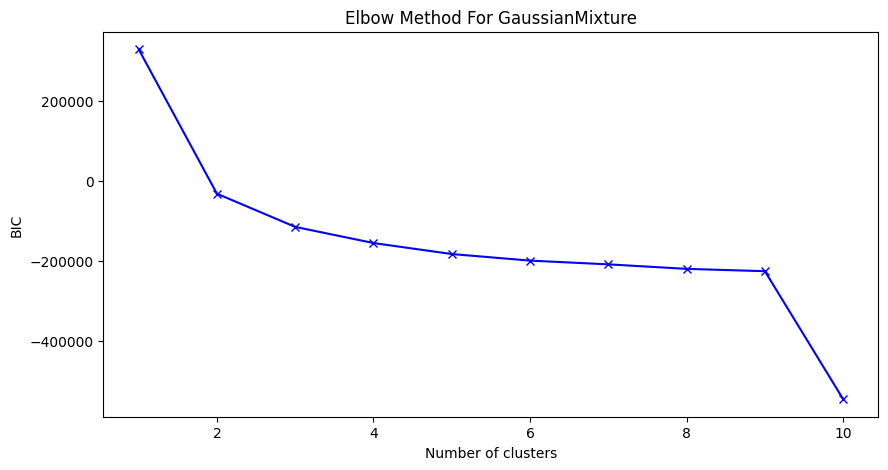

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, gmm_bic, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.title('Elbow Method For GaussianMixture')
plt.show()

In [8]:
eps_range = np.arange(0.5, 5.5, 0.5)
dbscan_silhouette = []
for eps in eps_range:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    clusters = dbscan.fit_predict(scaled_features)
    if len(set(clusters)) > 1:
        silhouette_avg = silhouette_score(scaled_features, clusters)
        dbscan_silhouette.append(silhouette_avg)
    else:
        dbscan_silhouette.append(-1)

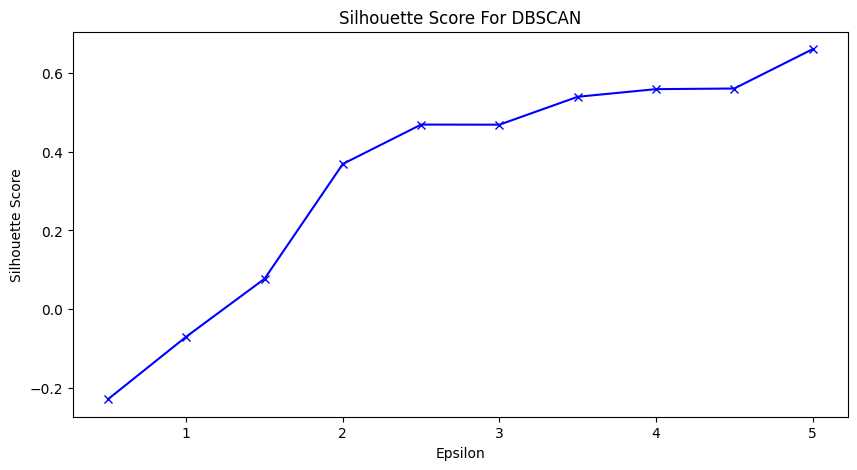

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(eps_range, dbscan_silhouette, 'bx-')
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For DBSCAN')
plt.show()

In [10]:
spectral_silhouette = []
for k in k_range:
    spectral = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', random_state=42)
    clusters = spectral.fit_predict(scaled_features)
    if len(set(clusters)) > 1:
        silhouette_avg = silhouette_score(scaled_features, clusters)
        spectral_silhouette.append(silhouette_avg)
    else:
        spectral_silhouette.append(-1)

C:\Users\ssudh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\ssudh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\ssudh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\ssudh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-pac

In [13]:
optimal_k_spectral = k_range[np.argmax(spectral_silhouette)]
print(f'Optimal number of clusters for Spectral Clustering: {optimal_k_spectral}')

Optimal number of clusters for Spectral Clustering: 2


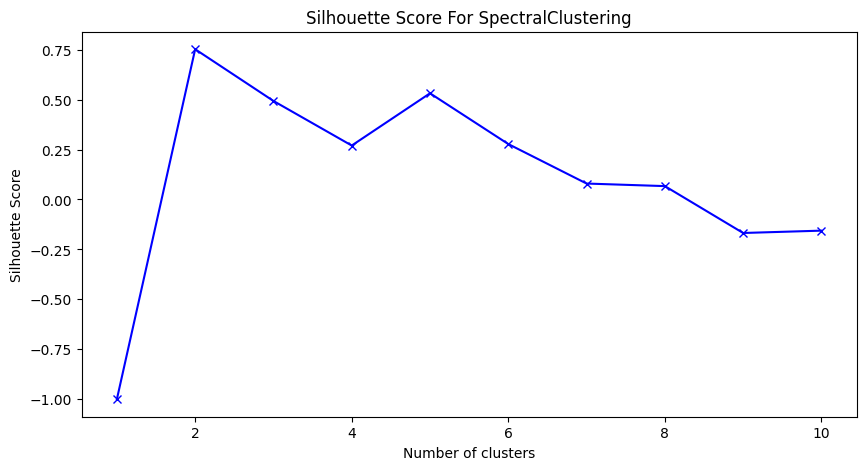

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, spectral_silhouette, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For SpectralClustering')
plt.show()

Finding Optimal Values for clusters based on data.

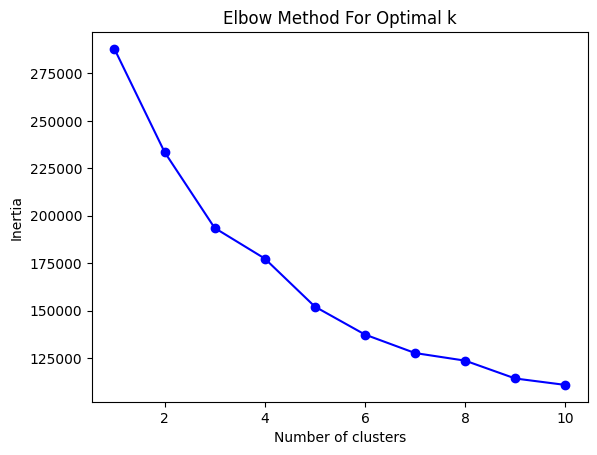

Optimal number of clusters for K-Means: 4


In [7]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

inertias = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertias.append(kmeans.inertia_)

plt.plot(K, inertias, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

second_derivatives = np.diff(inertias, 2)
optimal_k_kmeans = np.argmin(second_derivatives) + 2  # +2 due to the diff offset

print(f'Optimal number of clusters for K-Means: {optimal_k_kmeans}')

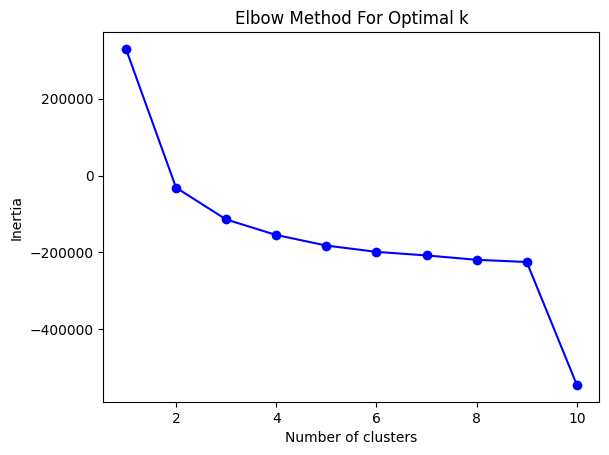

Optimal number of clusters for GMM: 9


In [12]:
inertias = []

K = range(1, 11)
for k in K:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(scaled_features)
    inertias.append(gmm.bic(scaled_features))


plt.plot(K, inertias, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

second_derivatives = np.diff(inertias, 2)
optimal_k_GMM = np.argmin(second_derivatives) + 2 

print(f'Optimal number of clusters for GMM: {optimal_k_GMM}')

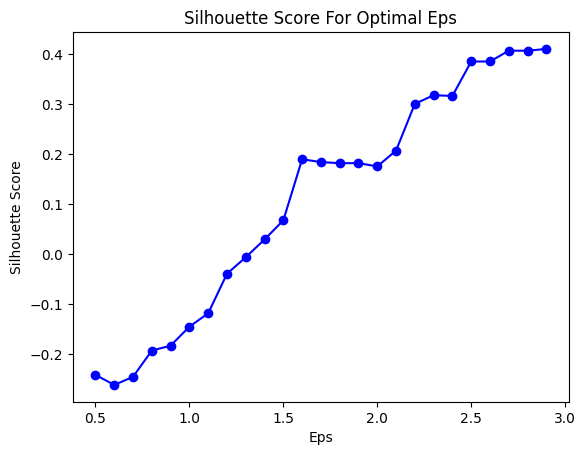

Optimal eps for DBSCAN: 2.8999999999999995


In [10]:
eps_values = np.arange(0.5, 3.0, 0.1)
silhouette_scores = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=2)
    labels = dbscan.fit_predict(scaled_features)
    if len(set(labels)) > 1:
        score = silhouette_score(scaled_features, labels)
    else:
        score = -1  
    silhouette_scores.append(score)

plt.plot(eps_values, silhouette_scores, 'bo-')
plt.xlabel('Eps')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal Eps')
plt.show()

optimal_eps_dbscan = eps_values[np.argmax(silhouette_scores)]
print(f'Optimal eps for DBSCAN: {optimal_eps_dbscan}')

In [14]:
# from sklearn.decomposition import PCA
# from sklearn.neighbors import kneighbors_graph



# from sklearn.decomposition import PCA
# pca = PCA(n_components=3)
# reduced_data = pca.fit_transform(scaled_features)

# # Create the nearest neighbors graph for a more memory-efficient affinity matrix
# n_neighbors = 10  # You can tune this parameter
# connectivity = kneighbors_graph(reduced_data, n_neighbors=n_neighbors, include_self=False)

# # Range of cluster numbers to test
# k_range = range(2, 11)
# silhouette_scores = []

# # Calculate silhouette score for different numbers of clusters
# for k in k_range:
#     spectral = SpectralClustering(n_clusters=k, affinity='precomputed', random_state=42)
#     affinity_matrix = 0.5 * (connectivity + connectivity.T)
#     labels = spectral.fit_predict(affinity_matrix)
#     score = silhouette_score(reduced_data, labels)
#     silhouette_scores.append(score)

# # Plot the silhouette scores
# plt.plot(k_range, silhouette_scores, 'bo-')
# plt.xlabel('Number of clusters')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Score For Optimal Number of Clusters')
# plt.show()

# # Find the number of clusters with the highest silhouette score
# optimal_k_spectral = k_range[np.argmax(silhouette_scores)]
# print(f'Optimal number of clusters for Spectral Clustering: {optimal_k_spectral}')